# Additional Part
using Numpy and vertor

<a name="toc_40291_2"></a>
# Problem Statement

Let's use the same two data points as before - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |

1. Activation Fucntion 

So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

In [33]:
import numpy as np
import matplotlib.pyplot as plt
x_data = np.array([1, 2])     # Size
y_data = np.array([300, 500]) # Price
data = np.array([[1,300],[2,500]])
a = data[:,0]
b = data[:,1]

In [34]:
print(f"x_data: {x_data}")
print(f"x_data.shape : {x_data.shape}")


x_data: [1 2]
x_data.shape : (2,)


In [35]:
def Linear_model(x, w):
    '''
    Input:
        w : Integar, representing weight
        x : NumpyArray, repersenting Size of the house 
    Output:
        y_hat : NumpyArray, prediction of Price, based on y = w * x
    '''  
    #TODO:
    # NumpyArray: Vector, w(int) * x(vector)
    y_hat = w * x

        
    return y_hat

# Set initial w value
w_init = 100
y_hat = Linear_model(x_data, w_init)
print(f"The result of prediction of y: {y_hat}")


The result of prediction of y: [100 200]


# 2.Cost Function
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

In [36]:
#Cost Function
def Cost_function(x, y, w):
    '''
    Input:
        w : Integar, representing weight
        x : NumpyArray, representing Size of the house 
        y : NumpyArray, representing Price of the house
    Output:
        Cost : Int
    '''  

    cost = 0
    f_wb = Linear_model(x , w)
    
    #TODO:
    val = (f_wb - y) ** 2
    cost = np.sum(val)
    
    
    return cost 
cost = Cost_function(x_data, y_data, w_init)
cost

130000

# 3. Gradient descent
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

In [37]:
#Gradient Descent
def gradient_function(x, y, w):
    '''
    Input:
        w : Integar, representing weight
        x : NumpyArray, representing Size of the house 
        y : NumpyArray, representing Price of the house
    Output:
        dj_dw : Float
    '''  
    m = len(x)
    dj_dw = 0.0
    f_wb = Linear_model(x , w)
    #TODO:
    val = (f_wb - y)
    dj_dw = np.dot(val,x)
    dj_dw /= m
    
    
    return dj_dw        

In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  


Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [38]:
def Gradient_Descent(x, y , w_init, lr, iteration):

    #For drawing figure, do not care
    cost_history = []
    w_history = []
    #Start Here
    w = w_init

    
    for num in range(iteration):


        dj_dw = gradient_function(x ,y, w)
        w = w - dj_dw * lr

        #For drawing figure, do not care
        cost = Cost_function(x,y,w)
        cost_history.append(cost)
        w_history.append(w)
        
        if (num % 10 == 0):
            print(f"Iter:{num:4}, Cost : {cost:0.4e}, "
                  f"dj_dw : {dj_dw:0.3e}, w : {w:0.3e}")
                  

    return w,cost,w_history,cost_history

# 4. Modulation Part
lr : learning rate \
iteration : the total amount of trainig \
You can justify lr and iteration to see the ultimate effect

Iter:   0, Cost : 1.2368e+05, dj_dw : -4.000e+02, w : 1.040e+02
Iter:  10, Cost : 7.5335e+04, dj_dw : -3.105e+02, w : 1.389e+02
Iter:  20, Cost : 4.6198e+04, dj_dw : -2.411e+02, w : 1.660e+02
Iter:  30, Cost : 2.8638e+04, dj_dw : -1.872e+02, w : 1.870e+02
Iter:  40, Cost : 1.8054e+04, dj_dw : -1.453e+02, w : 2.033e+02
Iter:  50, Cost : 1.1676e+04, dj_dw : -1.128e+02, w : 2.160e+02
Iter:  60, Cost : 7.8314e+03, dj_dw : -8.757e+01, w : 2.258e+02
Iter:  70, Cost : 5.5145e+03, dj_dw : -6.798e+01, w : 2.335e+02
Iter:  80, Cost : 4.1182e+03, dj_dw : -5.278e+01, w : 2.394e+02
Iter:  90, Cost : 3.2766e+03, dj_dw : -4.097e+01, w : 2.440e+02
Iter: 100, Cost : 2.7694e+03, dj_dw : -3.181e+01, w : 2.476e+02
Iter: 110, Cost : 2.4637e+03, dj_dw : -2.469e+01, w : 2.504e+02
Iter: 120, Cost : 2.2795e+03, dj_dw : -1.917e+01, w : 2.525e+02
Iter: 130, Cost : 2.1684e+03, dj_dw : -1.488e+01, w : 2.542e+02
Iter: 140, Cost : 2.1015e+03, dj_dw : -1.155e+01, w : 2.555e+02
Iter: 150, Cost : 2.0612e+03, dj_dw : -8

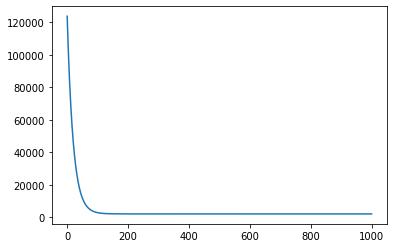

In [47]:

lr = 0.01
iteration  = 1000
w_new,cost_new,w_history,cost_history = Gradient_Descent(x_data,y_data,w_init,lr,iteration)
plt.plot(cost_history)


4